<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Importation des librairies et des données</h2>
</div>

In [1]:
#importations des librairies
import pandas as pd
import numpy as np 
import scipy
import scipy.stats as stats
#visualitions des données
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
#librairies machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,mean_squared_error, r2_score,ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import statsmodels.api as sm


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Chargement et exploration des données</h2>
</div>


In [2]:
#chargement des données
df = pd.read_csv('billets.csv',sep=';')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [5]:
print(df.isnull().sum())

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [6]:
print(df.columns)

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1. Séparer les données avec et sans valeurs manquantes</h3>
</div>

In [7]:


# Lignes où margin_low n'est PAS manquant (pour entraîner la régression)
df_complete = df[df['margin_low'].notnull()]

# Lignes où margin_low est manquant (à prédire)
df_missing = df[df['margin_low'].isnull()]



              diagonal  height_left  height_right  margin_low  margin_up  \
diagonal          1.00         0.02         -0.02       -0.11      -0.06   
height_left       0.02         1.00          0.24        0.30       0.24   
height_right     -0.02         0.24          1.00        0.39       0.31   
margin_low       -0.11         0.30          0.39        1.00       0.43   
margin_up        -0.06         0.24          0.31        0.43       1.00   
length            0.10        -0.31         -0.40       -0.67      -0.52   

              length  
diagonal        0.10  
height_left    -0.31  
height_right   -0.40  
margin_low     -0.67  
margin_up      -0.52  
length          1.00  


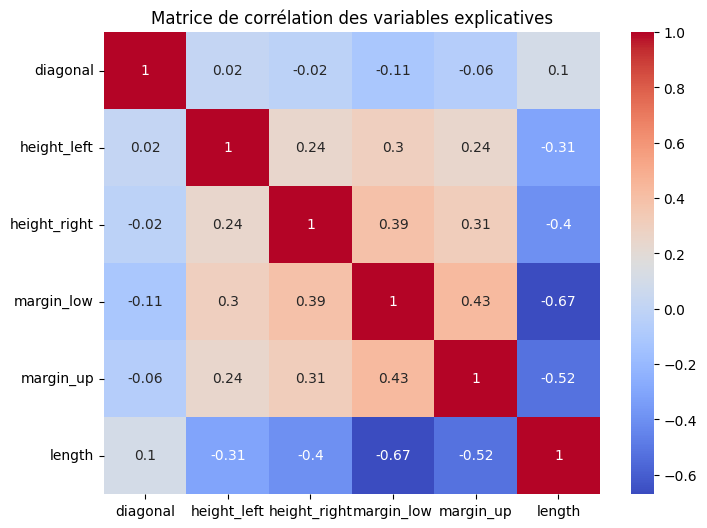

In [8]:
# On retire la colonne cible pour la corrélation entre variables explicatives
corr_matrix = df_complete.drop('is_genuine', axis=1).corr().round(2)
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation des variables explicatives")
plt.show()

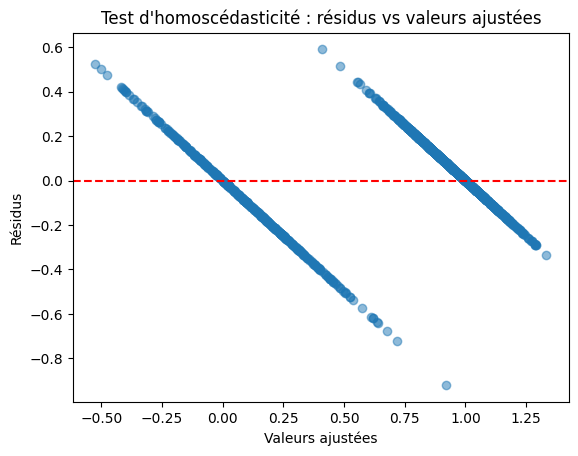

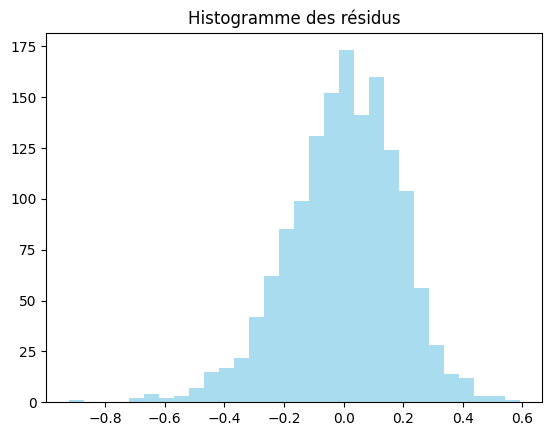

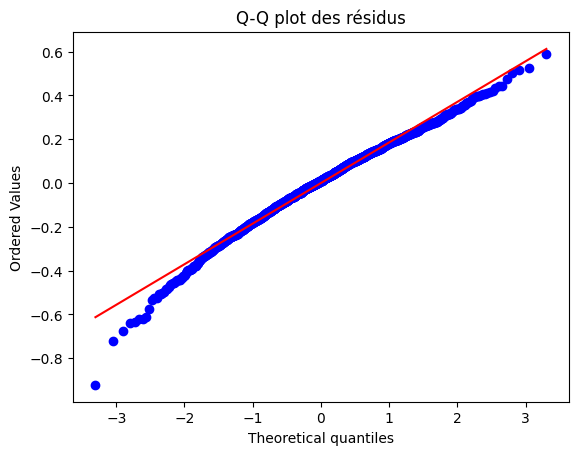

In [9]:
# Préparation des données
X = df_complete.drop('is_genuine', axis=1)
y = df_complete['is_genuine']
X_const = sm.add_constant(X)

# Ajustement du modèle linéaire
model = sm.OLS(y, X_const).fit()
residuals = model.resid
fitted_vals = model.fittedvalues

# Nuage de points résidus vs valeurs ajustées
plt.scatter(fitted_vals, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus')
plt.title('Test d\'homoscédasticité : résidus vs valeurs ajustées')
plt.show()


# Histogramme des résidus
plt.hist(residuals, bins=30, color='skyblue', alpha=0.7)
plt.title("Histogramme des résidus")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot des résidus")
plt.show()


Les hypothèses sont validées on peut donc faire une régression

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2. Préparer les variables pour la régression</h3>
</div>

In [10]:
# On enlève la colonne margin_low des features
X = df_complete.drop(['margin_low'], axis=1)
y = df_complete['margin_low']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = reg.predict(X_test)
MSE =mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))
print("p-values :\n", model.pvalues)

MSE : 0.13739452871780825
R2 : 0.6740384594304603
p-values :
 const            1.110232e-03
diagonal         2.064744e-04
height_left      1.002706e-07
height_right     1.094354e-16
margin_low      2.579893e-100
margin_up        8.186354e-42
length          3.765692e-169
dtype: float64


MSE (Mean Squared Error) : 0.137

    Définition : Moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles.

    Interprétation : Plus le MSE est petit, plus le modèle colle bien aux données. 0.137 indique donc une erreur moyenne faible, donc c'est un modèle plutôt précis.

R² : 0.67

    Définition : Pourcentage de la variance de la variable cible expliqué par le modèle.

    Interprétation : R² = 0.67 signifie que 67 % des variations de la variable à prédire sont expliquées par les variables du modèle. Plus R² est proche de 1, plus le modèle est performant.

p value :
    Définition : La p-value teste si le coefficient de chaque variable est significativement différent de zéro (c’est-à-dire si la variable a un effet réel sur la prédiction).

    Interprétation :
    p-value < 0.05 : la variable est significative (elle a un effet réel sur la prédiction).
    p-value > 0.05 : la variable n’est pas significative (on ne peut pas prouver son effet).

 Toutes les p-values sont très faibles, donc toutes les variables sont utiles et ont un effet réel dans le modèle.

prédire les valeurs manquantes de df_missing

In [14]:
X_missing = df_missing.drop(['margin_low'], axis=1)
predicted_margin_low = reg.predict(X_missing)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.mettre à jour les valeurs manquantes du df de base</h3>
</div>

In [15]:
df.loc[df['margin_low'].isnull(), 'margin_low'] = predicted_margin_low

In [16]:
print(df.isnull().sum())

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


In [17]:
print(df.dtypes)

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object


In [18]:
print(df['is_genuine'].unique())


[ True False]


Préparation des données

In [19]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [20]:
df['is_genuine'] = df['is_genuine'].astype(int)


In [21]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


Analyse exploratoire

In [22]:
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.482772,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.659832,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [23]:
df.to_csv('billets_corriges.csv', sep=';', index=False)

Recherche de valeurs extrêmes (outliers)

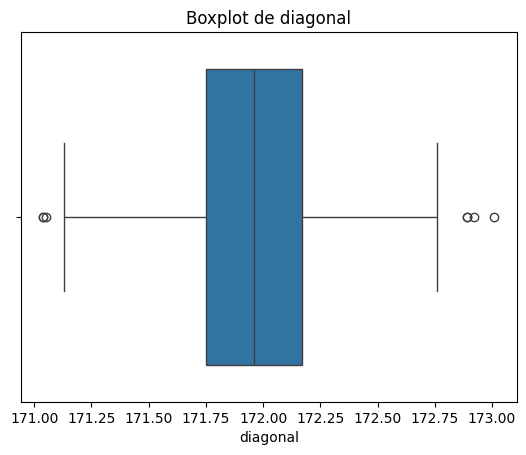

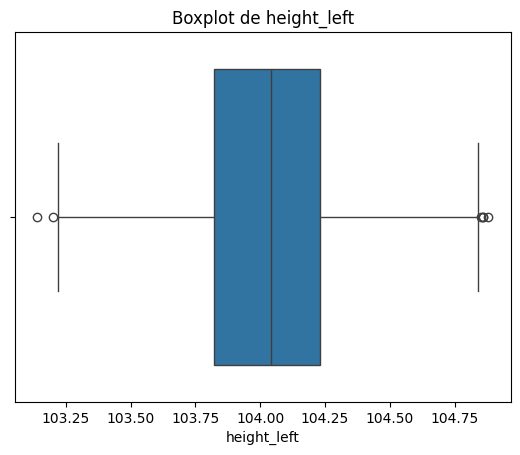

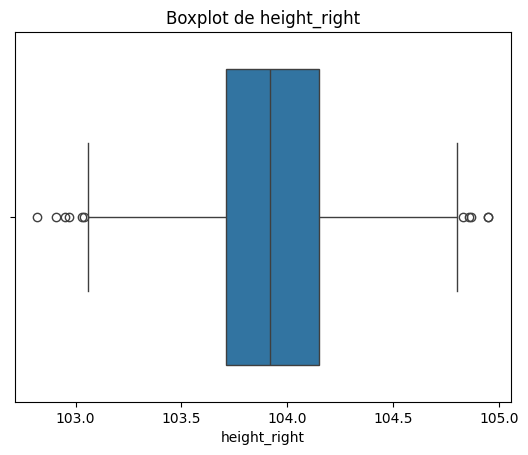

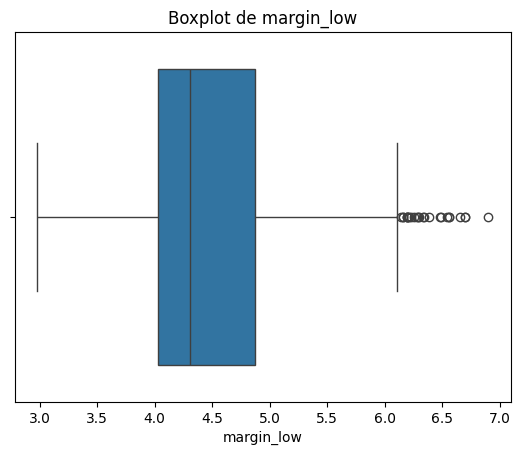

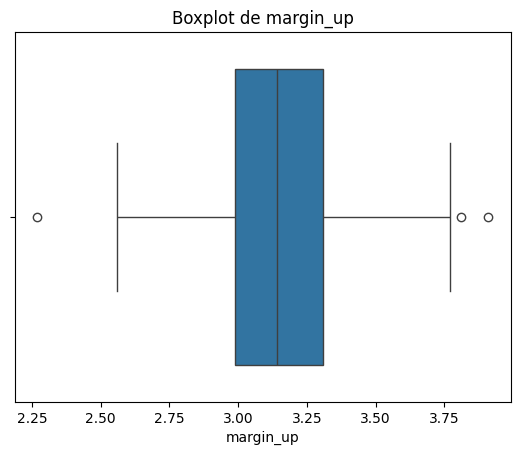

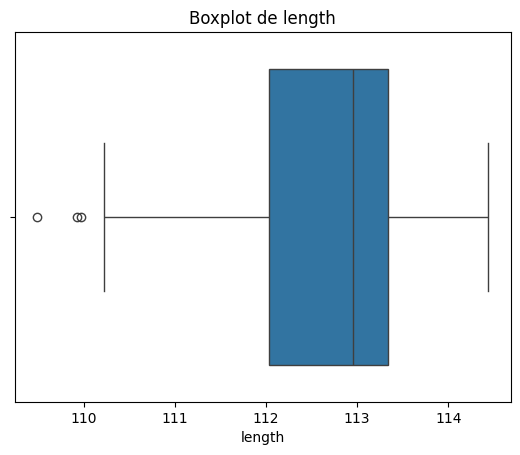

In [24]:
for col in ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Méthode et modéle kmean 2 centroids</h2>
</div>


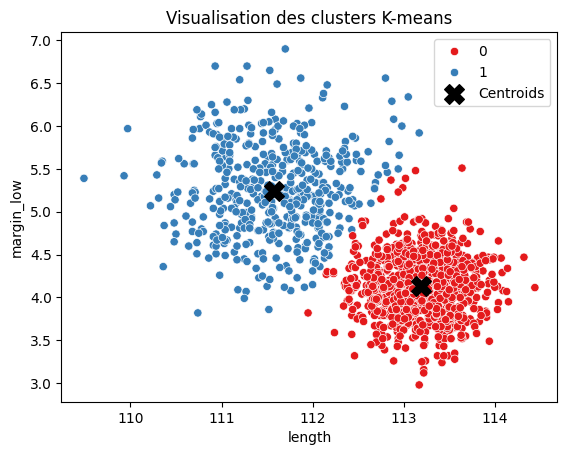

In [25]:
kmeans = KMeans(n_clusters=2, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['length', 'margin_low']])

centroids = kmeans.cluster_centers_

sns.scatterplot(x='length', y='margin_low', hue='cluster', data=df, palette='Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title('Visualisation des clusters K-means')
plt.legend()
plt.show()

              is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine          1.00      0.13        -0.38         -0.49       -0.79   
diagonal            0.13      1.00         0.02         -0.02       -0.11   
height_left        -0.38      0.02         1.00          0.24        0.31   
height_right       -0.49     -0.02         0.24          1.00        0.39   
margin_low         -0.79     -0.11         0.31          0.39        1.00   
margin_up          -0.61     -0.06         0.25          0.31        0.43   
length              0.85      0.10        -0.32         -0.40       -0.67   
cluster            -0.95     -0.13         0.36          0.46        0.79   

              margin_up  length  cluster  
is_genuine        -0.61    0.85    -0.95  
diagonal          -0.06    0.10    -0.13  
height_left        0.25   -0.32     0.36  
height_right       0.31   -0.40     0.46  
margin_low         0.43   -0.67     0.79  
margin_up          1.00   -0.52     0.58  
lengt

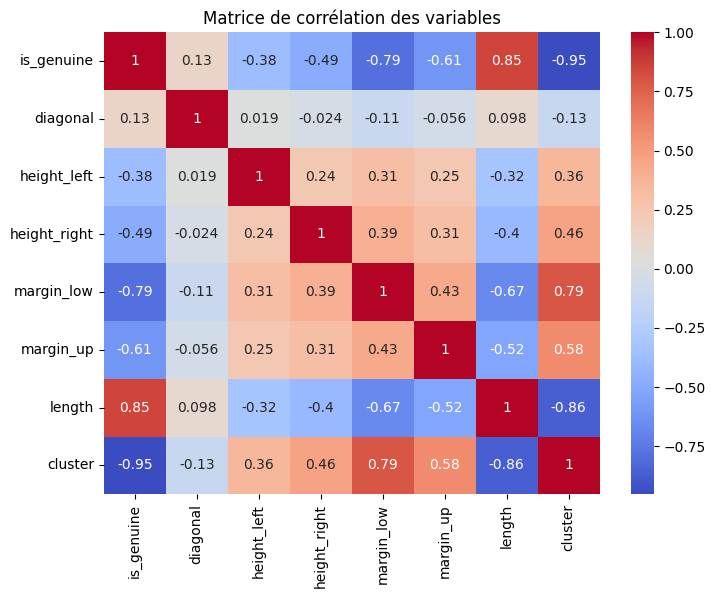

In [26]:
corr_matrix = df.corr()
print(corr_matrix.round(2))

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation des variables")
plt.show()


Pour voir la relation entre deux variables, par exemple length et diagonal, et différencier vrais/faux billets :

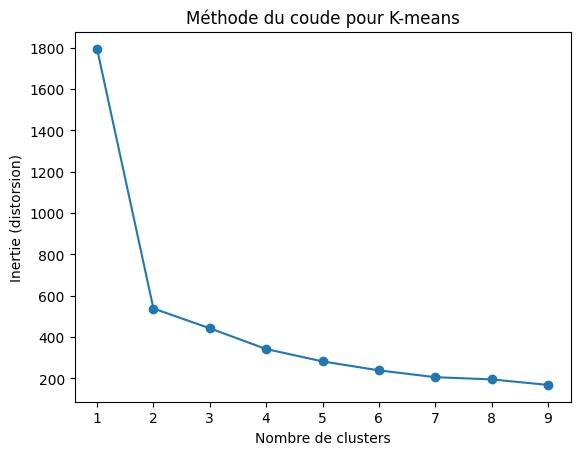

In [27]:
distortions = []
X_kmeans = df[['length', 'margin_low']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_kmeans)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (distorsion)')
plt.title('Méthode du coude pour K-means')
plt.show()


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)
explained_var = np.cumsum(pca.explained_variance_ratio_)

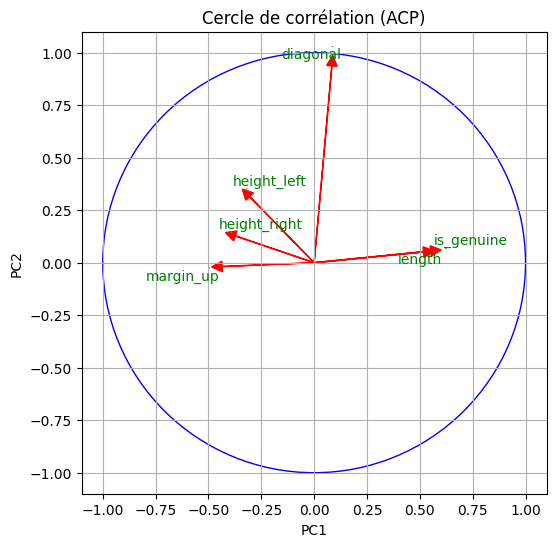

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



# Cercle de corrélation
from adjustText import adjust_text

plt.figure(figsize=(6,6))
texts = []
for i, var in enumerate(X.columns):
    # Flèche
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.05, head_length=0.05, color='r')
    # Texte (on stocke les objets texte dans une liste)
    texts.append(
        plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, var, color='g', ha='center', va='center')
    )
circle = plt.Circle((0,0), 1, color='b', fill=False)
plt.gca().add_artist(circle)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation (ACP)')
plt.grid()

# Ajustement automatique des labels pour éviter le chevauchement
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey', lw=0.5))

plt.show()



In [30]:
print(pd.crosstab(df['is_genuine'], df['cluster'], rownames=['Vérité'], colnames=['Cluster']))

Cluster    0    1
Vérité           
0         28  472
1        997    3


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Méthode et modéle kmean 3 centroids</h2>
</div>


             length  margin_low  height_left
length         1.00       -0.67        -0.32
margin_low    -0.67        1.00         0.31
height_left   -0.32        0.31         1.00


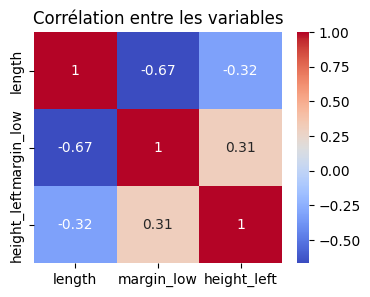

In [31]:
vars_kmeans = ['length', 'margin_low', 'height_left']
corr_matrix = df[vars_kmeans].corr()
print(corr_matrix.round(2))

plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables")
plt.show()


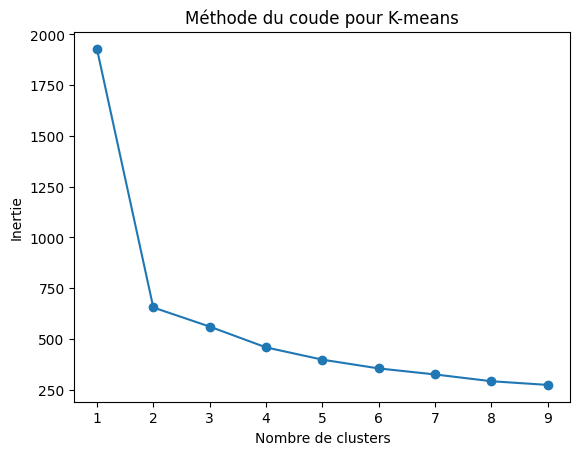

In [32]:
inertias = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[vars_kmeans])
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour K-means')
plt.show()


In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[vars_kmeans])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


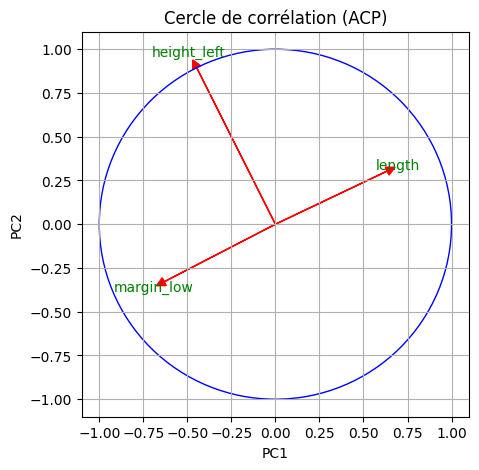

In [34]:
plt.figure(figsize=(5,5))
for i, var in enumerate(vars_kmeans):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.05, head_length=0.05, color='r')
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, var, color='g', ha='center', va='center')
circle = plt.Circle((0,0), 1, color='b', fill=False)
plt.gca().add_artist(circle)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation (ACP)')
plt.grid()
plt.show()

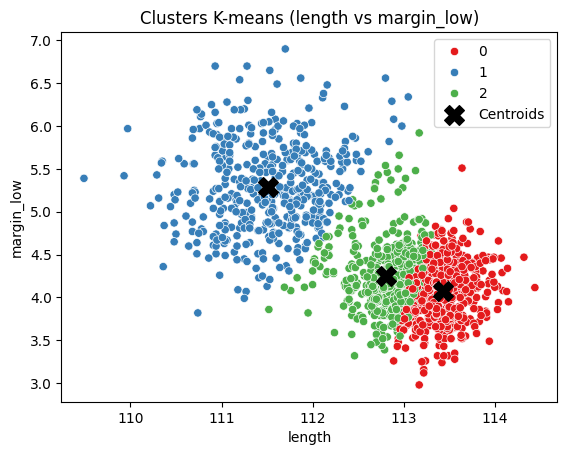

In [35]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[vars_kmeans])

centroids = kmeans.cluster_centers_

# Visualisation en 2D (choisir deux variables pour l'affichage)
sns.scatterplot(x='length', y='margin_low', hue='cluster', data=df, palette='Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title('Clusters K-means (length vs margin_low)')
plt.legend()
plt.show()


In [36]:
if 'is_genuine' in df.columns:
    print(pd.crosstab(df['is_genuine'], df['cluster'], rownames=['Vérité'], colnames=['Cluster']))

Cluster    0    1    2
Vérité                
0          2  436   62
1        595    0  405


In [37]:
print(df.groupby('cluster')[vars_kmeans].mean())

             length  margin_low  height_left
cluster                                     
0        113.429966    4.077780   103.916298
1        111.506904    5.287029   104.189243
2        112.811670    4.249633   104.025182


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Test des modèles</h2>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Régression logistique</h2>
</div>


In [38]:
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [39]:
print("Logistic Regression - Évaluation du modèle")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

# Matrice de confusion sous forme de tableau
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Faux', 'Vrai'], columns=['Prédit Faux', 'Prédit Vrai'])
print("\nMatrice de confusion logistic regression :\n")
print(df_cm)

Logistic Regression - Évaluation du modèle
Accuracy : 0.99
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Matrice de confusion logistic regression :

      Prédit Faux  Prédit Vrai
Faux           98            2
Vrai            1          199


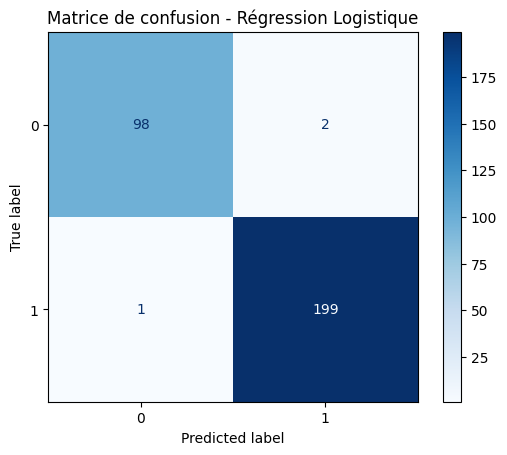

In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Matrice de confusion - Régression Logistique')
plt.show()

       Variable  Coefficient
5        length     3.975660
3    margin_low    -3.491675
4     margin_up    -3.013831
2  height_right    -2.071513
1   height_left    -1.349161
0      diagonal    -0.383199
6       cluster     0.176691


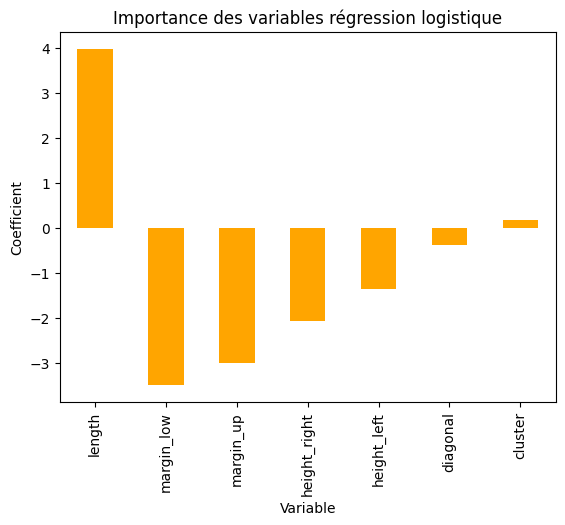

In [41]:
importance = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)
print(importance)
# Affichage graphique
importance.plot.bar(x='Variable', y='Coefficient', legend=False, color='orange')
plt.title('Importance des variables régression logistique')
plt.ylabel('Coefficient')
plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">KNN</h2>
</div>


In [42]:
# Séparation des variables
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle KNN (par exemple k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

KNN - Évaluation du modèle
Accuracy : 0.98
Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       100
           1       0.98      0.99      0.99       200

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300

Matrice de confusion knn
      Prédit Faux  Prédit Vrai
Faux           96            4
Vrai            2          198


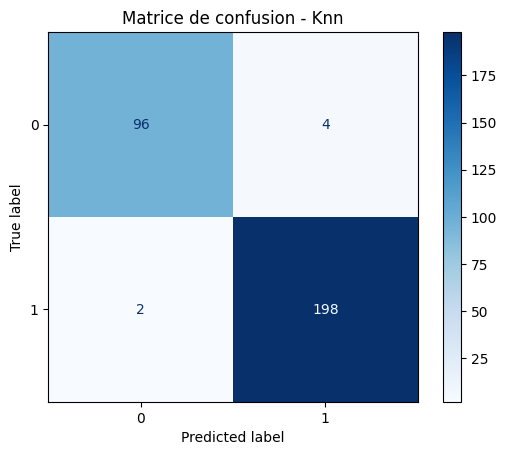

In [43]:
y_pred = knn.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("KNN - Évaluation du modèle")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))
# Matrice de confusion sous forme de tableau
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Faux', 'Vrai'], columns=['Prédit Faux', 'Prédit Vrai'])
print("Matrice de confusion knn")
print(df_cm)

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=model.classes_)
display.plot(cmap='Blues')
plt.title('Matrice de confusion - Knn')
plt.show()

importance des variable non possible en knn

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Random Forest</h2>
</div>


Random Forest - Évaluation du modèle
Accuracy : 0.99
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Matrice de confusion  random forest :

      Prédit Faux  Prédit Vrai
Faux           98            2
Vrai            1          199


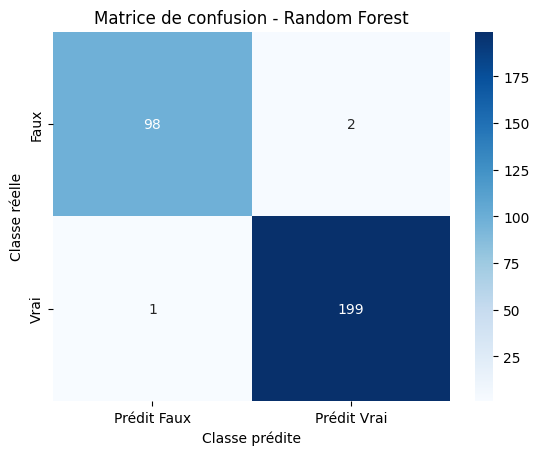

In [44]:
# Séparation des variables
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédiction
y_pred = rf.predict(X_test)

# Évaluation
print("Random Forest - Évaluation du modèle")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

# Matrice de confusion sous forme de tableau
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Faux', 'Vrai'], columns=['Prédit Faux', 'Prédit Vrai'])
print("\nMatrice de confusion  random forest :\n")
print(df_cm)

# Affichage graphique
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion - Random Forest')
plt.ylabel('Classe réelle')
plt.xlabel('Classe prédite')
plt.show()


Importance des variables :
       Variable  Importance
5        length    0.416459
3    margin_low    0.262830
6       cluster    0.134819
4     margin_up    0.116028
2  height_right    0.041071
1   height_left    0.021894
0      diagonal    0.006900


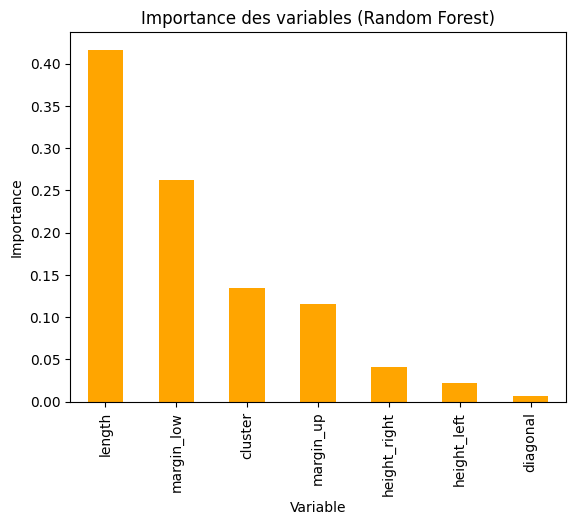

In [45]:
importances = rf.feature_importances_
feat_importance = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("\nImportance des variables :")
print(feat_importance)

# Affichage graphique
feat_importance.plot.bar(x='Variable', y='Importance', legend=False, color='orange')
plt.title('Importance des variables (Random Forest)')
plt.ylabel('Importance')
plt.show()


Comparaison des résultats

Modèle	Accuracy	Avantage principal	Limite principale
K-means	~0.5	Aucun besoin d’étiquette	Ne sépare pas bien les classes
Régression logistique	0.99	Précis, rapide, interprétable	-
KNN	0.987	Simple, efficace	Sensible à l’échelle, un peu moins précis
Random Forest	0.99	Puissant, robuste, importance des variables	Plus complexe, moins interprétable

Choix du modèle final : Random Forest

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Sauvegarder le modèle Random Forest entraîné</h2>
</div>

In [46]:
import joblib

# Sauvegarder le modèle Random Forest entraîné
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']